In [1]:
import keras
print(keras.__version__)

2025-12-29 07:47:12.046134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766994432.221183      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766994432.273528      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766994432.699696      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766994432.699735      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766994432.699738      55 computation_placer.cc:177] computation placer alr

3.10.0


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models

from PIL import Image
from sklearn.preprocessing import LabelEncoder

from matplotlib.ticker import MaxNLocator
from matplotlib.image import imread

In [3]:
# # Set TPU strategy
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [4]:
path = "/kaggle/input/plant-disease-classification-merged-dataset"
os.listdir(path)

['Tomato__septoria_leaf_spot',
 'Tea__anthracnose',
 'Rice__hispa',
 'Soybean__diabrotica_speciosa',
 'Tomato__healthy',
 'Gauva__diseased',
 'Wheat__yellow_rust',
 'Soybean__downy_mildew',
 'Pomegranate__diseased',
 'Apple__rust',
 'Tea__algal_leaf',
 'Pomegranate__healthy',
 'Tomato__early_blight',
 'Peach__bacterial_spot',
 'Soybean__healthy',
 'Potato__healthy',
 'Cherry__healthy',
 'Apple__healthy',
 'Rice__neck_blast',
 'Wheat__septoria',
 'Jamun__healthy',
 'Strawberry___leaf_scorch',
 'Coffee__rust',
 'Mango__healthy',
 'Mango__diseased',
 'Apple__black_rot',
 'Soybean__powdery_mildew',
 'Lemon__healthy',
 'Pepper_bell__healthy',
 'Strawberry__healthy',
 'Cassava__healthy',
 'Corn__healthy',
 'Jamun__diseased',
 'Corn__common_rust',
 'Tomato__yellow_leaf_curl_virus',
 'Coffee__cercospora_leaf_spot',
 'Grape__black_measles',
 'Rice__healthy',
 'Tea__healthy',
 'Soybean__caterpillar',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Coffee__red_spider_mite',
 'Soybean__rust',
 'To

In [5]:
# Create an instance of ImageDataGenerator for normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create an instance of ImageDataGenerator for normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

input_size = (224,224)

# Set the batch size
batch_size = 64

In [6]:
# List all subdirectories in the given path
subdirectories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# Create lists to store filenames and labels
filenames = []
labels = []

# Iterate through each subdirectory
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(path, subdirectory)

    # List all files in the subdirectory
    image_files = [f for f in os.listdir(subdirectory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Append filenames and labels to the lists
    filenames.extend([os.path.join(subdirectory, file) for file in image_files])
    labels.extend([subdirectory] * len(image_files))

# Convert lists to numpy arrays
filenames = np.array(filenames)
labels = np.array(labels)

In [7]:
len(np.unique(labels))

88

In [8]:
# Calculate statistics
total_samples = len(labels)
unique_labels, class_counts = np.unique(labels, return_counts=True)
average_samples_per_class = total_samples / len(unique_labels)
min_samples_in_class = min(class_counts)
max_samples_in_class = max(class_counts)

# Print statistics
print("Total Samples:", total_samples)
print("Average Samples per Class:", average_samples_per_class)
print("Min Samples in a Class:", min_samples_in_class)
print("Max Samples in a Class:", max_samples_in_class)

Total Samples: 79086
Average Samples per Class: 898.7045454545455
Min Samples in a Class: 22
Max Samples in a Class: 11390


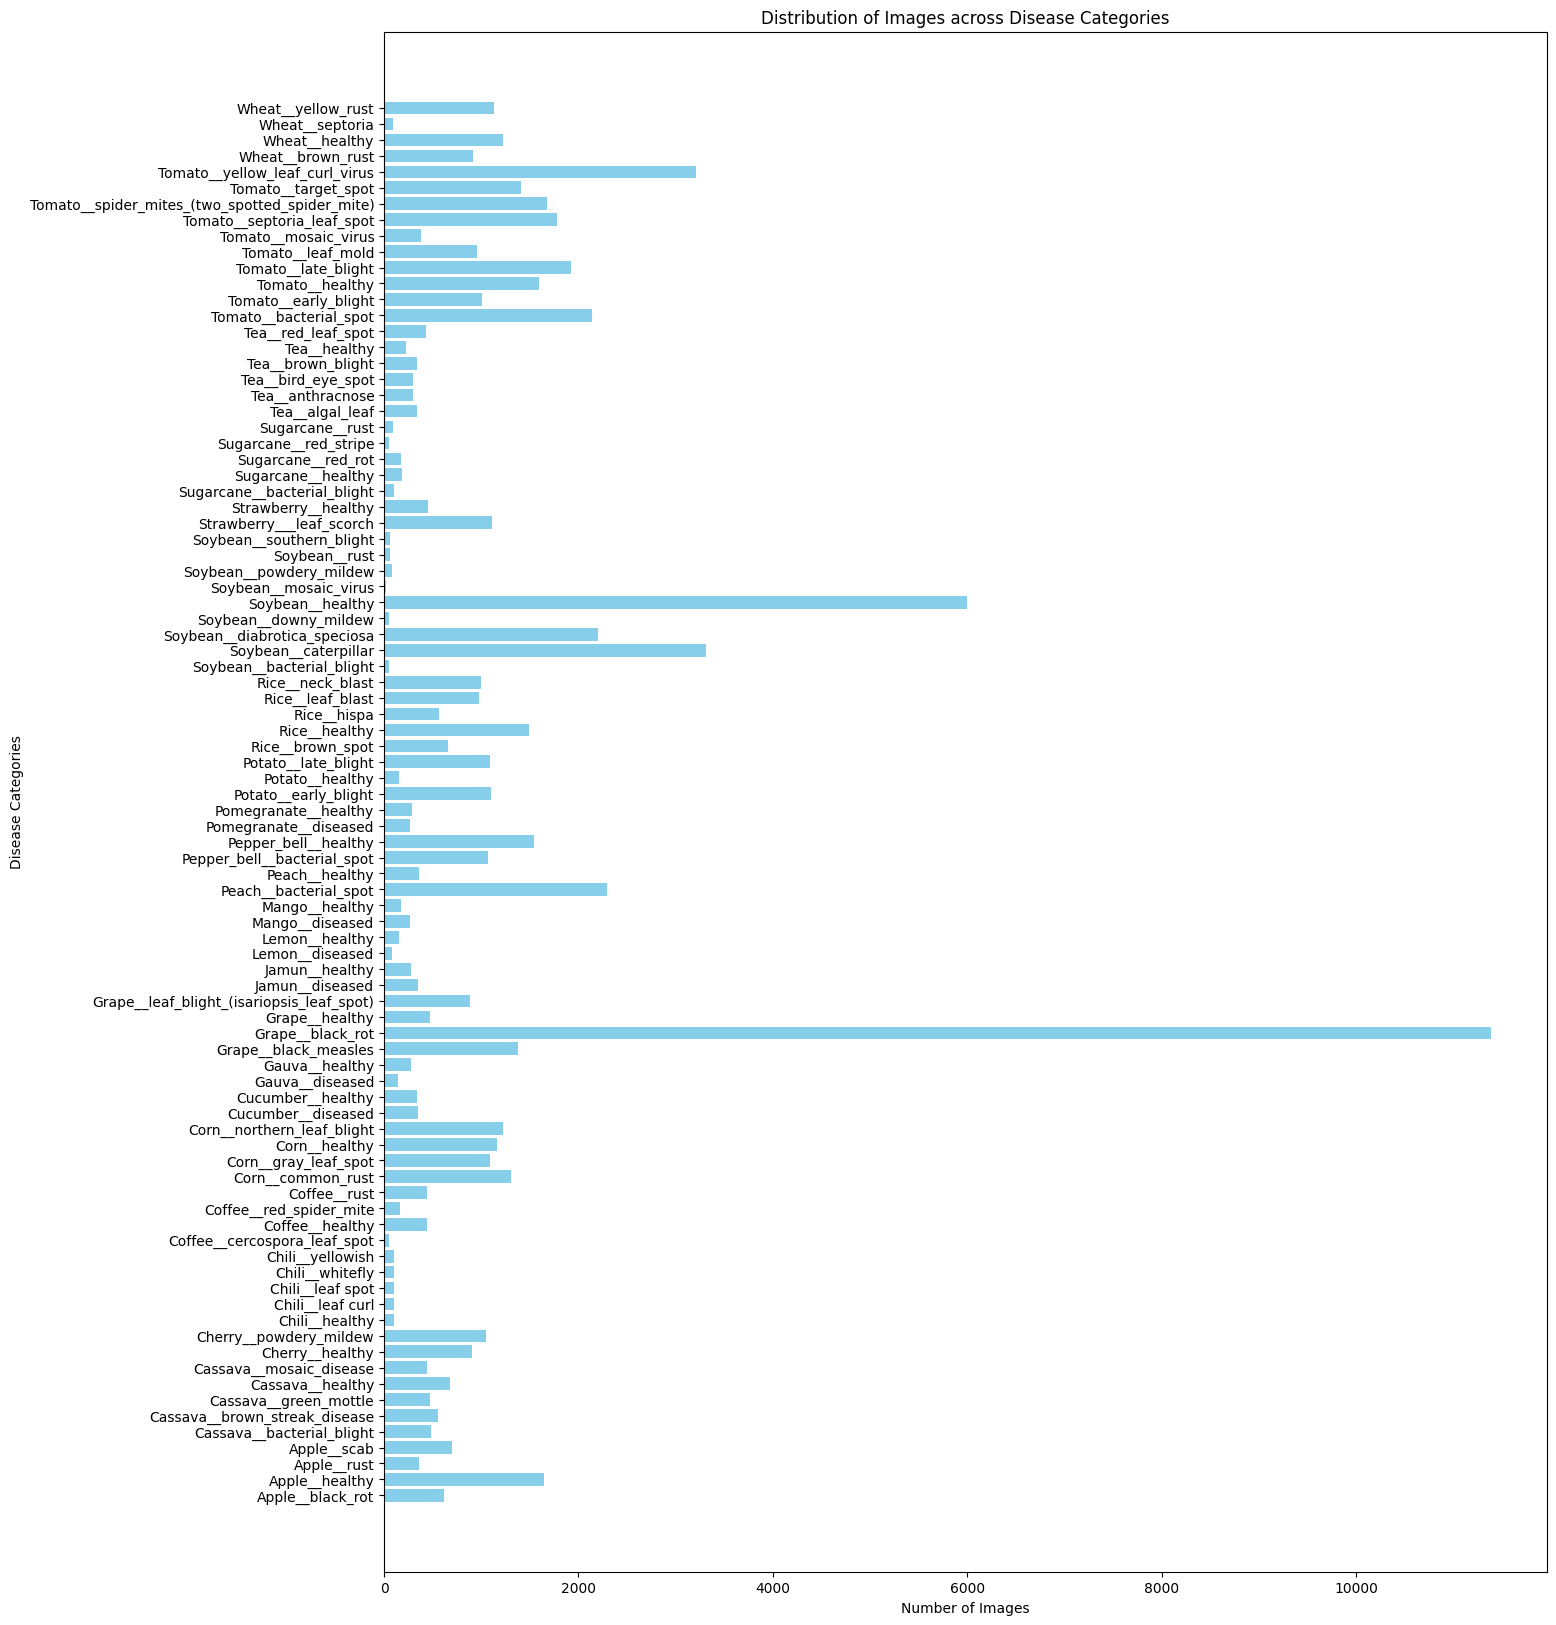

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Set the size of the plot
plt.figure(figsize=(15, 20))  # Adjust the figure size accordingly

# Plot the horizontal bar chart
plt.barh(unique_labels, label_counts, color='skyblue')  # You can customize the color if needed
plt.xlabel('Number of Images')
plt.ylabel('Disease Categories')
plt.title('Distribution of Images across Disease Categories')

# Show the plot
plt.show()


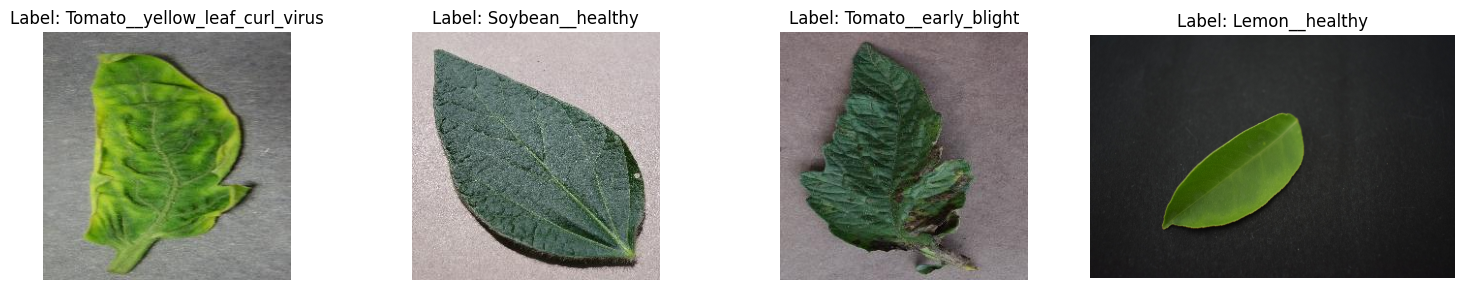

In [10]:
# Display a few images along with their labels in the same row
num_images_to_display = 4  # Change this to the desired number of images
selected_indices = np.random.choice(len(filenames), num_images_to_display, replace=False)

# Set up the subplots
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i, index in enumerate(selected_indices):
    image_path = os.path.join(path, filenames[index])
    label = labels[index]

    # Load and display the image using PIL
    img = Image.open(image_path)
    
    # You can optionally resize the image if needed
    # img = img.resize((width, height))

    # Display the image on the corresponding subplot
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [11]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
numerical_labels = label_encoder.fit_transform(labels)

In [12]:
np.unique(numerical_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [13]:
# Split your data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(filenames, numerical_labels, test_size=0.1, random_state=42, stratify=numerical_labels)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert string labels to integers for all sets
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

In [14]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [15]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [16]:
# Create data generators for training, validation, and testing
train_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': x_train, 'class': y_train}),
    directory=path,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' for numerical labels
    shuffle=True
)

validation_generator = train_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': x_val, 'class': y_val}),
    directory=path,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' for numerical labels
    shuffle=False  # No shuffling for validation
)

test_generator = test_datagen.flow_from_dataframe(
    pd.DataFrame({'filename': x_test, 'class': y_test}),
    directory=path,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' for numerical labels
    shuffle=False  # No shuffling for testing
)

Found 71177 validated image filenames.
Found 3954 validated image filenames.
Found 3955 validated image filenames.


## DenseNet Model 

In [17]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import pandas as pd
import numpy as np

# Build DenseNet model
densenet = DenseNet121(weights='imagenet', include_top=False)

input = Input(shape=(224, 224, 3))
x = Conv2D(3, (3, 3), padding='same')(input)

x = densenet(x)

x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Add another Dense layer
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Multi output
output = Dense(88, activation='softmax', name='root')(x)

# Model
model = Model(input, output)

# Using ExponentialDecay for learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)
model.summary()

I0000 00:00:1766994581.105566      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 88)             │        11,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,349,868 (28.04 MB)

 Trainable params: 7,263,404 (27.71 MB)

 Non-trainable params: 86,464 (337.75 KB)

In [18]:
 from sklearn.utils.class_weight import compute_class_weight
 from tabulate import tabulate

# # Get unique class labels from your DataFrame
 unique_classes = np.unique(y_train)

# # Calculate class weights using unique class labels
 class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_train)

# # Convert to dictionary
 class_weight_dict = dict(zip(unique_classes, class_weights))

# # Print class weights in a table
 table = tabulate(class_weight_dict.items(), headers=['Class', 'Weight'], tablefmt='pretty')
 print(table)

+-------+---------------------+
| Class |       Weight        |
+-------+---------------------+
|   0   | 1.4469222637827288  |
|   1   | 0.5450333864248958  |
|   2   |  2.519718210138771  |
|   3   | 1.2838564213564214  |
|   4   | 1.8508685250676098  |
|   5   |  1.611214233973198  |
|   6   | 1.9076168524871355  |
|   7   | 1.3281273324376772  |
|   8   | 2.0220738636363635  |
|   9   | 0.9924288901282766  |
|  10   |  0.854096668906595  |
|  11   |  8.98699494949495   |
|  12   |  8.98699494949495   |
|  13   |  8.98699494949495   |
|  14   |  8.98699494949495   |
|  15   |  8.98699494949495   |
|  16   |  16.17659090909091  |
|  17   | 2.0476697353279634  |
|  18   |  5.39219696969697   |
|  19   |  2.032235038830516  |
|  20   |  0.687195875492392  |
|  21   | 0.8211467466543608  |
|  22   | 0.7732596036850339  |
|  23   | 0.7346317397407316  |
|  24   |  2.567712842712843  |
|  25   | 2.6346239265620373  |
|  26   |  6.318980823863637  |
|  27   |  3.248311427528295  |
|  28   

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [21]:
# Build and train the model
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('/kaggle/working/model_epoch_{epoch:02d}.keras',
    save_best_only=False, verbose=1)

# Fits the model on batches with real-time data augmentatio
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    callbacks=[annealer, checkpoint],
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight=class_weight_dict  # Pass the class weights here
)

Epoch 1/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1292 - loss: 3.3343
Epoch 1: saving model to /kaggle/working/model_epoch_01.keras
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 1767s 2s/step - accuracy: 0.1292 - loss: 3.3341 - val_accuracy: 0.2810 - val_loss: 2.4732 - learning_rate: 9.0000e-04
Epoch 2/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3172 - loss: 2.4688
Epoch 2: saving model to /kaggle/working/model_epoch_02.keras
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 1463s 1s/step - accuracy: 0.3173 - loss: 2.4686 - val_accuracy: 0.3078 - val_loss: 2.5958 - learning_rate: 8.1000e-04
Epoch 3/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5004 - loss: 1.8629
Epoch 3: saving model to /kaggle/working/model_epoch_03.keras
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 1630s 1s/step - accuracy: 0.5004 - loss: 1.8629 - val_accuracy: 0.4712 - val_loss: 1.7060 - learning_rate: 7.2900e-04
Epoch 4/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5968 - loss: 1.5356
Epoch 4: saving mod

In [22]:
# حفظ الموديل بالكامل في ملف H5
model.save("model.keras")
from IPython.display import FileLink

# لو حفظتيه كملف واحد
FileLink("model.keras")


/kaggle/working/model.keras

In [25]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/model_epoch_20.keras')

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,           # الإجمالي
    initial_epoch=20,    # يبدأ من 20
    callbacks=[annealer, checkpoint],
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight=class_weight_dict
)


Epoch 21/25
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9174 - loss: 0.2505
Epoch 21: saving model to /kaggle/working/model_epoch_21.keras
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 1765s 1s/step - accuracy: 0.9174 - loss: 0.2505 - val_accuracy: 0.9150 - val_loss: 0.2914 - learning_rate: 8.8629e-05
Epoch 22/25
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9194 - loss: 0.2441
Epoch 22: saving model to /kaggle/working/model_epoch_22.keras
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 1447s 1s/step - accuracy: 0.9194 - loss: 0.2441 - val_accuracy: 0.9373 - val_loss: 0.1988 - learning_rate: 7.9766e-05
Epoch 23/25
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9248 - loss: 0.2280
Epoch 23: saving model to /kaggle/working/model_epoch_23.keras
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 1448s 1s/step - accuracy: 0.9248 - loss: 0.2280 - val_accuracy: 0.9368 - val_loss: 0.1982 - learning_rate: 6.4611e-05
Epoch 24/25
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9255 - loss: 0.2294
Epoch 24: sa

In [26]:
model.save("model2.keras")
from IPython.display import FileLink

# لو حفظتيه كملف واحد
FileLink("model2.keras")


/kaggle/working/model2.keras

## Plotting the history

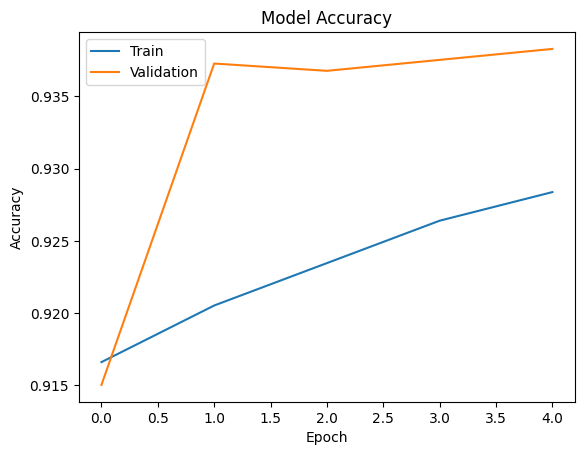

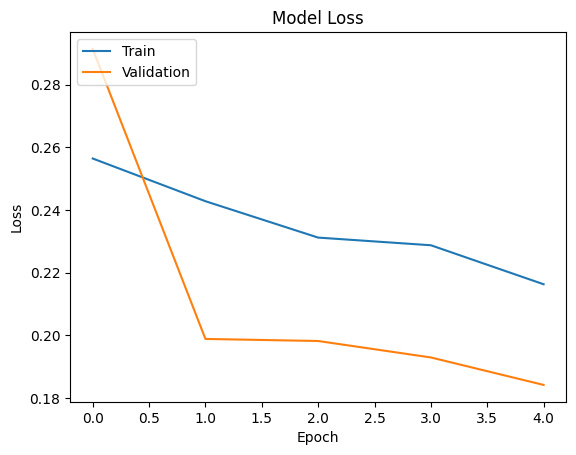

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Visualizing the predictions

62/62 ━━━━━━━━━━━━━━━━━━━━ 71s 974ms/step


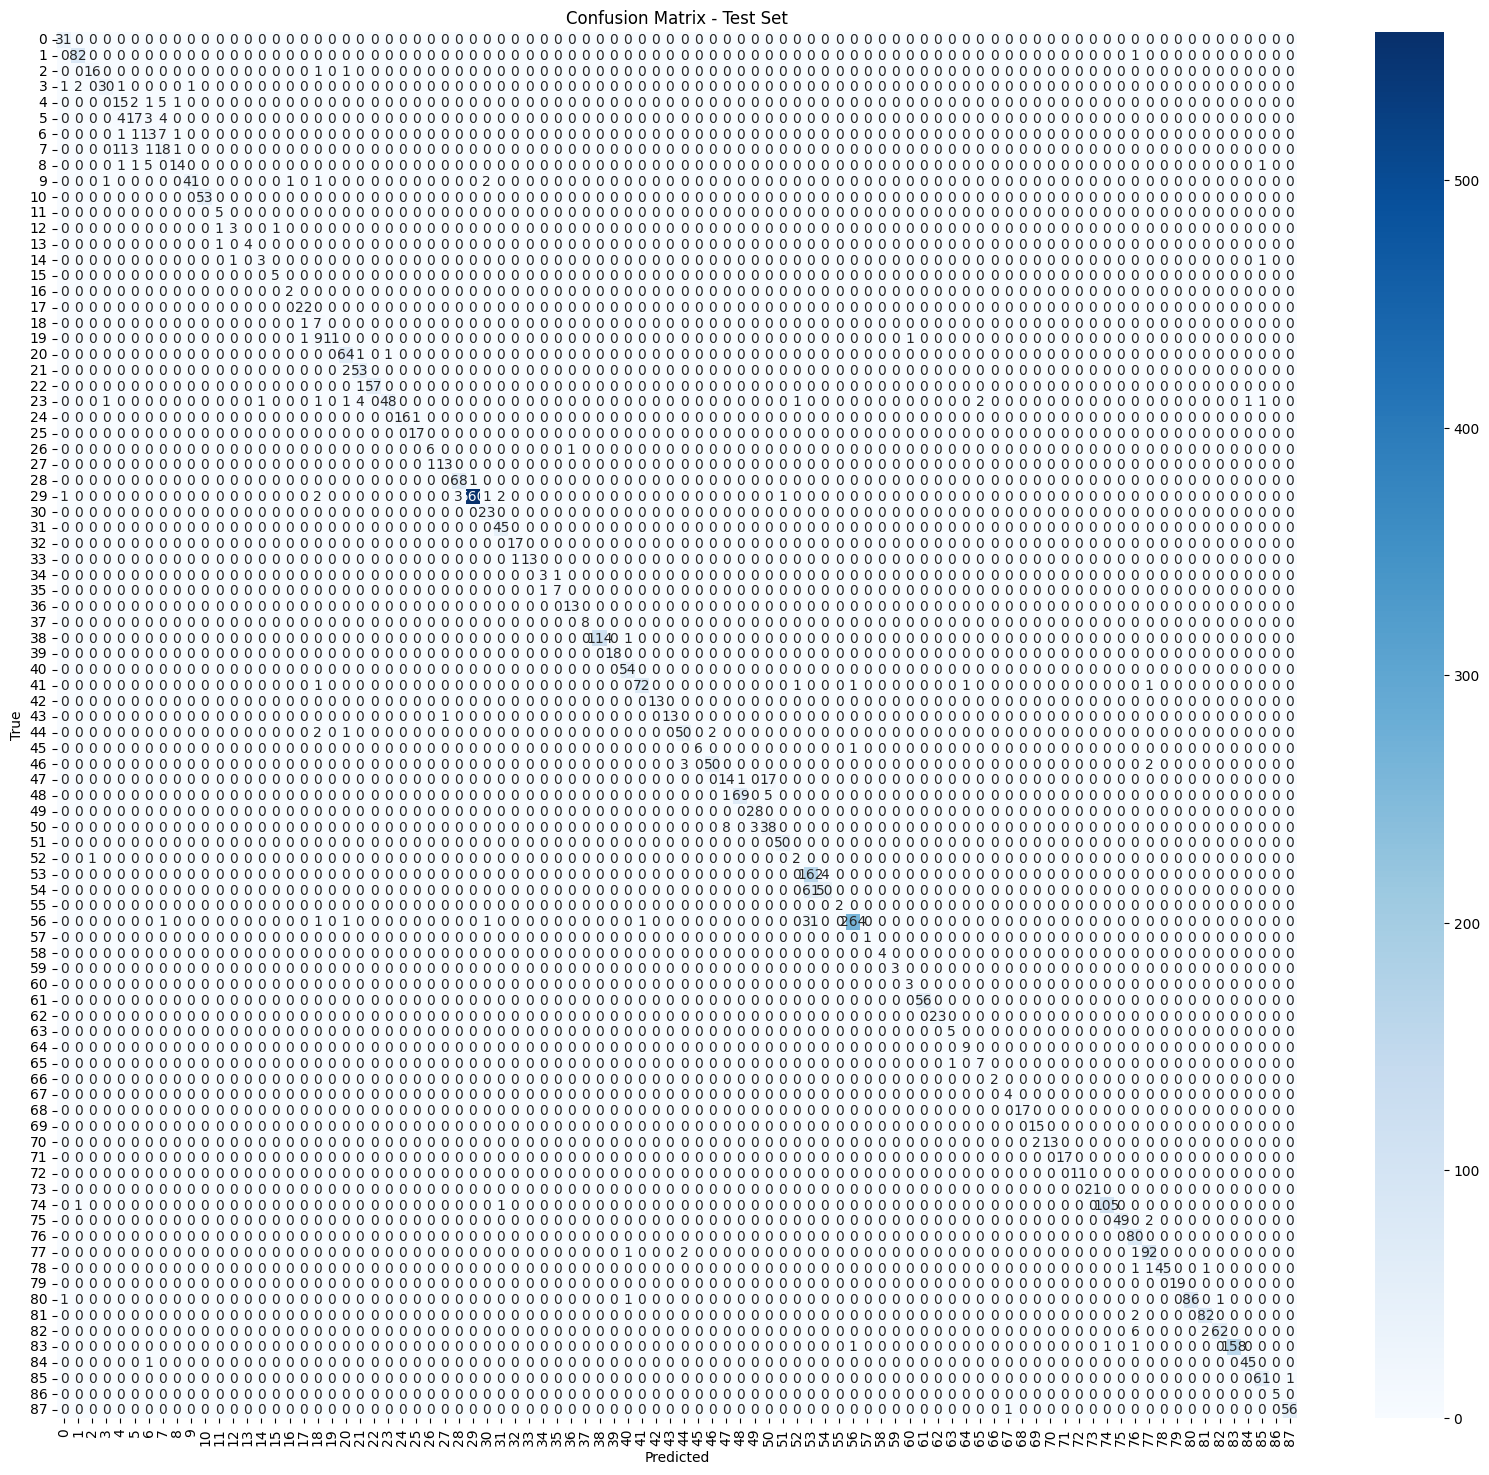

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       0.96      0.99      0.98        83
           2       0.94      0.89      0.91        18
           3       0.94      0.86      0.90        35
           4       0.45      0.62      0.53        24
           5       0.71      0.61      0.65        28
           6       0.54      0.57      0.55        23
           7       0.51      0.53      0.52        34
           8       0.82      0.64      0.72        22
           9       0.98      0.89      0.93        46
          10       1.00      1.00      1.00        53
          11       0.71      1.00      0.83         5
          12       0.75      0.60      0.67         5
          13       1.00      0.80      0.89         5
          14       0.75      0.60      0.67         5
          15       0.83      1.00      0.91         5
          16       0.67      1.00      0.80    

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
predictions_test = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels_test = np.argmax(predictions_test, axis=1)

# Get true labels
true_labels_test = test_generator.labels

# Compute confusion matrix for the test set
cm_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Plot the heatmap
plt.figure(figsize=(20, 18))  # Increase the figure size
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(88), yticklabels=np.arange(88))
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report - Test Set:")
report = classification_report(true_labels_test, predicted_labels_test, target_names=[str(i) for i in range(88)])
print(report)